# Two point correlation function

This notebook produces plots from the correlation functions computed by post_processing.py  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams

from parameters import *
import plot_auxiliars

In [2]:
# Loading the files
correlation = np.load(corr_dir + 'correlation.npy')
error = np.load(corr_dir + 'error.npy')
covariance = np.load(corr_dir + 'covariance.npy')
shape_hist = correlation.shape

In [3]:
# Number of points and maximum value of the wedge plots
points = int((numpix_rp + numpix_rt) / 2)
rmax = (rpmax + rtmax) / 2
# Values of the limits in mu=cos(theta) for the wedges
mus = [0., 0.5, 0.8, 0.95, 1.]

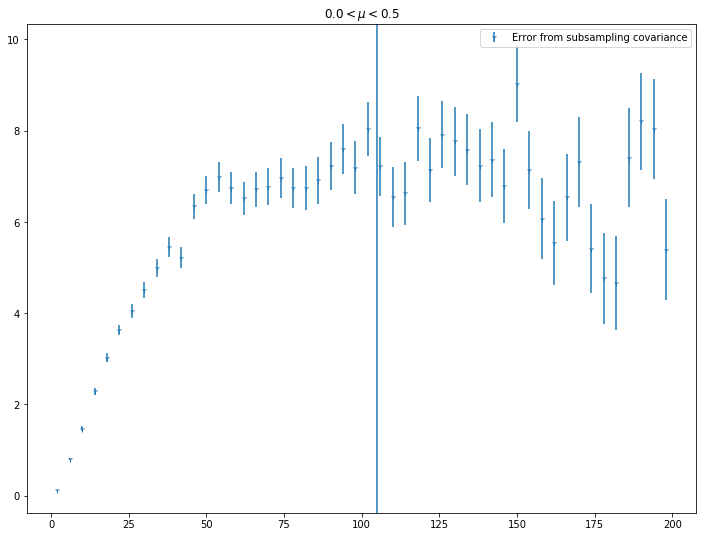

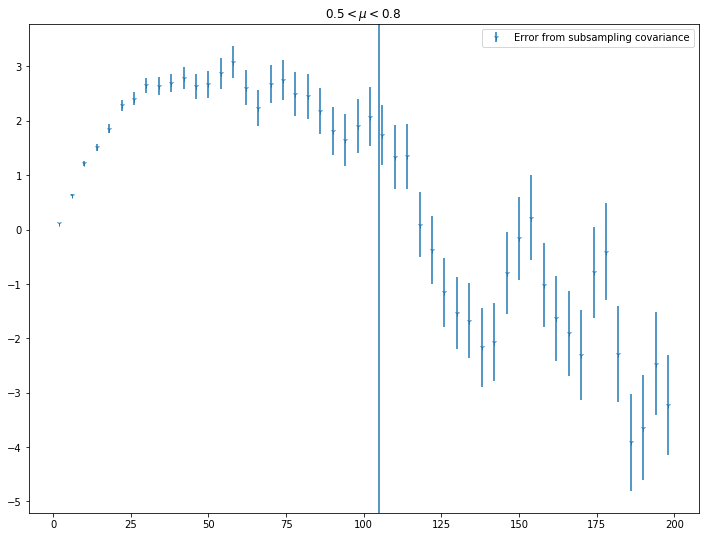

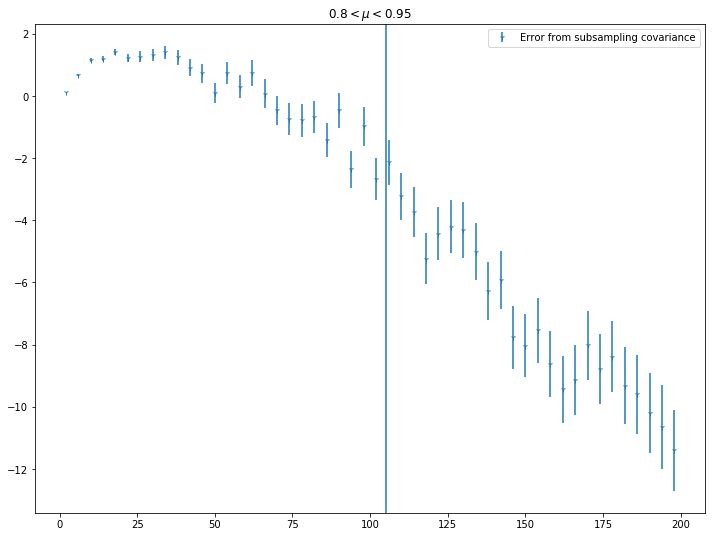

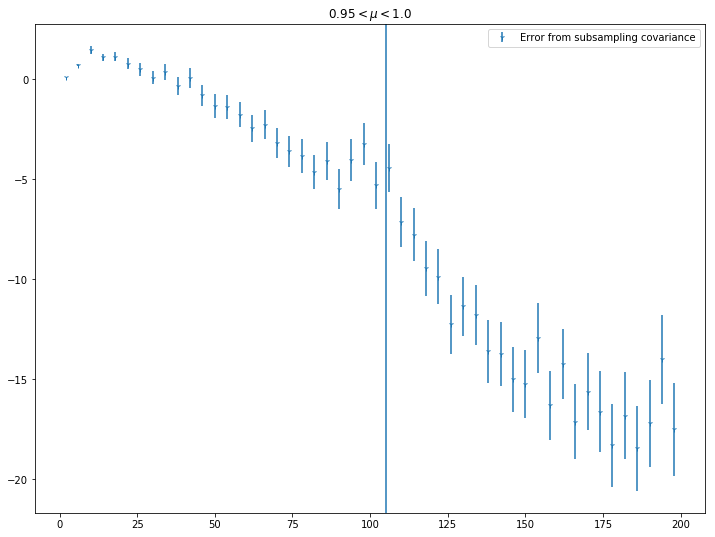

In [4]:
# mus = [0., 1.]
for mumin,mumax in zip(mus[:-1],mus[1:]):
    plt.figure(figsize=(12, 9))
    rrr,corr, error2 = plot_auxiliars.wedges_weighted_co(mumin, mumax, shape_hist, points, rmax, rpmax, rtmax,  correlation, covariance)
    np.save('wedge'+ str(mumin) + '_' + str(mumax),[rrr,corr,np.sqrt(error2)])
    plt.title(str(mumin) + r'$ < \mu < $' + str(mumax))
    plt.errorbar(rrr, corr*rrr**2, yerr = np.sqrt(error2)*rrr**2 , fmt = '1', label = 'Error from subsampling covariance')
    plt.axvline(x = 105)
    plt.legend()
    plt.savefig(corr_dir + str(mumin) + '_' + str(mumax) + '.jpg')
    plt.show()

<Figure size 648x648 with 0 Axes>

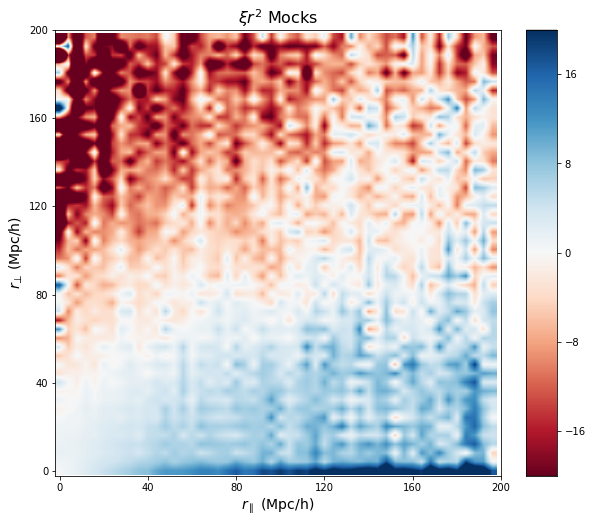

In [5]:
# If the plot is too saturated or too white, adjust the scale
scale = 20

bin_size_rp = rpmax / numpix_rp
bin_size_rt = rtmax / numpix_rt
r_1p = np.array([np.arange(0, rtmax, bin_size_r) + bin_size_r / 2 for i in range(numpix_rp)])
r_1t = np.array([np.arange(0, rpmax, bin_size_r) + bin_size_r / 2 for i in range(numpix_rt)])
r_2d2 = r_1p**2 + np.transpose(r_1t**2)

from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import ImageGrid
class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

norm = MidpointNormalize(midpoint=0)


plt.figure(figsize=(9, 9))
cmap=plt.get_cmap('RdBu')

fig = plt.figure(figsize=(9, 9))

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,1),
                 axes_pad=(0.2,0.5),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.35,
                 )


for ax in grid:
    im = ax.imshow(correlation*r_2d2,
origin='lower', cmap=cmap, interpolation='bilinear', norm=norm,
vmin=-scale,vmax=scale)
    ax.set_title(r'$\xi r^2$ Mocks', fontsize = 16)

    ax.set_xticks(np.arange(0,60,10))
    ax.set_xticklabels(['0','40','80', '120', '160','200'])
    ax.set_yticks(np.arange(0,60,10))
    ax.set_yticklabels(['0','40','80', '120', '160','200'])
    ax.set_xlabel(r'$r_{\parallel}$ (Mpc/h)', fontsize = 14)
    ax.set_ylabel(r'$r_{\bot}$ (Mpc/h)', fontsize = 14)
    
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.savefig(corr_dir + '/2d_corr.jpg')

plt.show()